<a href="https://colab.research.google.com/github/math-maven/introduction2pytorch/blob/main/introduction_to_pytorch_03_creating_a_simple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0.5,0.5)])

In [ ]:

train_dataset = torchvision.datasets.FashionMNIST(root = '/content/data', download =True,train=True,transform = transform  )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32,shuffle =True)

100%|██████████| 26421880/26421880 [00:01<00:00, 15555663.99it/s]


Extracting /content/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 267362.85it/s]


Extracting /content/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4967040.66it/s]


Extracting /content/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11975749.86it/s]


Extracting /content/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw



In [ ]:
test_dataset = torchvision.datasets.FashionMNIST(root = '/content/data', download =True,train=False,transform = transform  )
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32,shuffle =False)

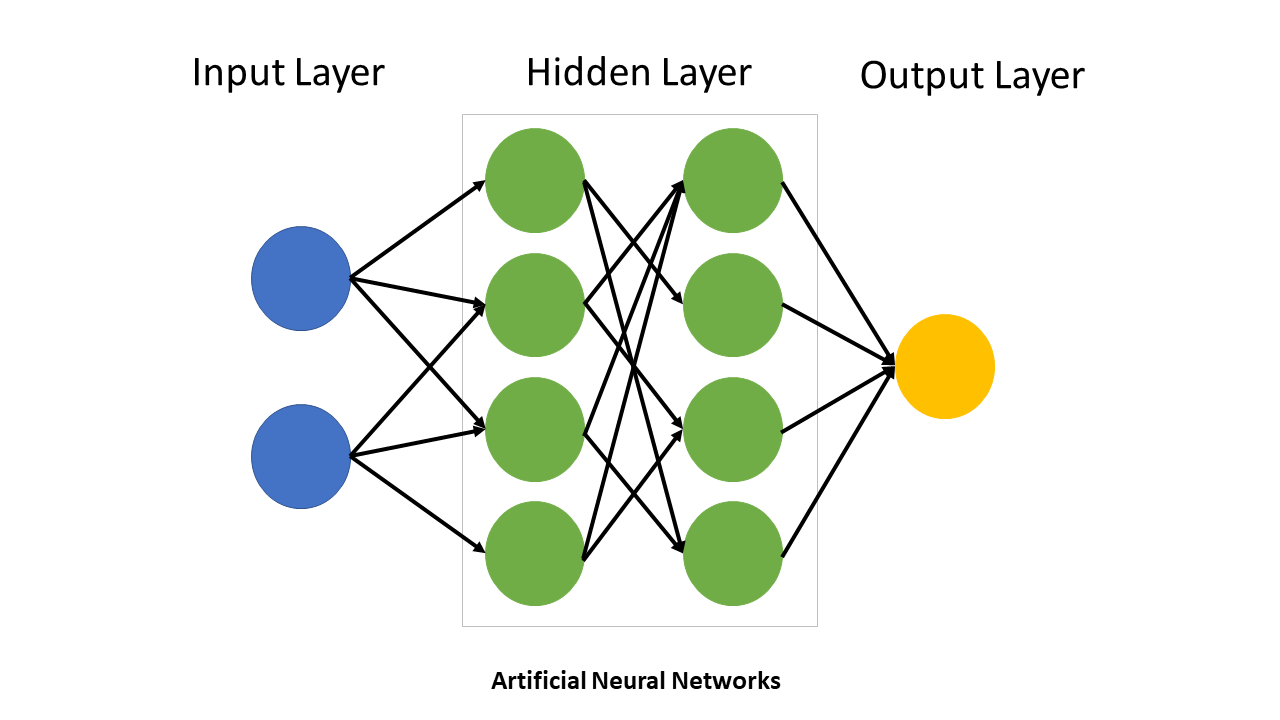

In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier,self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784,128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128,10)
        self.softmax = nn.Softmax(dim =1)

    def forward(self,x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        outputs = self.softmax(x)
        return outputs

In [ ]:
model = SimpleClassifier()
model.to(device)

SimpleClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
from torchsummary import summary
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
           Softmax-5                   [-1, 10]               0
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
num_epoch =3

In [ ]:
for epoch in range(num_epoch):
    for i,(images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(f"epoch : {epoch+1} batch:{i}  , loss :{loss}")

epoch : 1 batch:0  , loss :2.300654172897339
epoch : 1 batch:100  , loss :1.7145389318466187
epoch : 1 batch:200  , loss :1.7477266788482666
epoch : 1 batch:300  , loss :1.7369413375854492
epoch : 1 batch:400  , loss :1.7390639781951904
epoch : 1 batch:500  , loss :1.6784944534301758
epoch : 1 batch:600  , loss :1.6566944122314453
epoch : 1 batch:700  , loss :1.6938846111297607
epoch : 1 batch:800  , loss :1.6101148128509521
epoch : 1 batch:900  , loss :1.641503930091858
epoch : 1 batch:1000  , loss :1.7568538188934326
epoch : 1 batch:1100  , loss :1.7555971145629883
epoch : 1 batch:1200  , loss :1.5999956130981445
epoch : 1 batch:1300  , loss :1.6031755208969116
epoch : 1 batch:1400  , loss :1.5447776317596436
epoch : 1 batch:1500  , loss :1.6233158111572266
epoch : 1 batch:1600  , loss :1.653104543685913
epoch : 1 batch:1700  , loss :1.5776219367980957
epoch : 1 batch:1800  , loss :1.649071216583252
epoch : 2 batch:0  , loss :1.5816665887832642
epoch : 2 batch:100  , loss :1.67968726

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images,labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        predictions = torch.argmax(outputs ,dim =1)
        correct += (predictions==labels).sum().item()
        total += labels.size(0)
print(correct/total)

0.8319


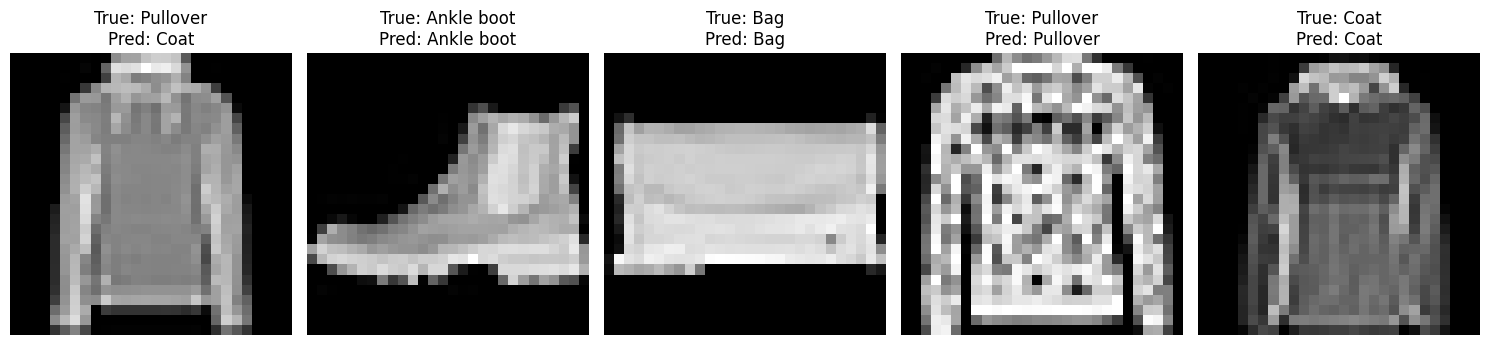

In [ ]:
import random


class_names =train_dataset.classes

num_samples = 5
sample_indices = random.sample(range(len(test_dataset)), num_samples)

model.eval()

plt.figure(figsize=(15, 10))
for idx, sample_idx in enumerate(sample_indices):
    image, label = test_dataset[sample_idx]
    image = image.unsqueeze(0)  # Add batch dimension
    image = image.to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        predicted_label = predicted.item()

    plt.subplot(2, num_samples, idx + 1)
    plt.imshow(image[0][0].to("cpu"), cmap='gray')
    plt.title(f"True: {class_names[label]}\nPred: {class_names[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()